In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
import pandas as pd
# Assuming the file is in the current directory
file_path = '/content/thyroidDF.csv'
# Load the CSV file into a Pandas DataFrame
df = pd.read_csv(file_path)

In [ ]:
columns_to_keep = ['age', 'sex', 'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'TBG', 'target']
# Drop columns except the specified ones
df = df[columns_to_keep]
df

,age,sex,TSH,T3,TT4,T4U,FTI,TBG,target
0,29,F,0.3,NaN,NaN,NaN,NaN,NaN,-
1,29,F,1.6,1.9,128.0,NaN,NaN,NaN,-
2,41,F,NaN,NaN,NaN,NaN,NaN,11.0,-
3,36,F,NaN,NaN,NaN,NaN,NaN,26.0,-
4,32,F,NaN,NaN,NaN,NaN,NaN,36.0,S
...,...,...,...,...,...,...,...,...,...
9167,56,M,NaN,NaN,64.0,0.83,77.0,NaN,-
9168,22,M,NaN,NaN,91.0,0.92,99.0,NaN,-
9169,69,M,NaN,NaN,113.0,1.27,89.0,NaN,I
9170,47,F,NaN,NaN,75.0,0.85,88.0,NaN,-


In [ ]:
import pandas as pd

# Assuming df is your DataFrame containing the data
# Drop the 'TBG' column
df.drop('TBG', axis=1, inplace=True)

# Remove entries with 'target' column equal to "-"
df = df[df['target'] != "-"]

# Resetting index after dropping rows
df.reset_index(drop=True, inplace=True)

# Display the modified DataFrame
print(df)

      age sex    TSH   T3    TT4   T4U    FTI target
0      32   F    NaN  NaN    NaN   NaN    NaN      S
1      63   F  68.00  NaN   48.0  1.02   47.0      F
2      75   F   0.05  1.6  157.0  0.89  176.0     AK
3      41   M   0.05  1.6   39.0  1.00   39.0      R
4      71   F   0.05  NaN  126.0  1.38   91.0      I
...   ...  ..    ...  ...    ...   ...    ...    ...
2396   64   M   0.81  NaN   31.0  0.55   56.0      K
2397   60   M   0.18  NaN   28.0  0.87   32.0      K
2398   64   M    NaN  NaN   44.0  0.53   83.0      J
2399   36   F    NaN  NaN   84.0  1.26   67.0      I
2400   69   M    NaN  NaN  113.0  1.27   89.0      I

[2401 rows x 8 columns]


In [ ]:
import pandas as pd

# Display count of rows before removing null values
print("Number of rows before removing null values:", df.shape[0])

# Remove null values
df = df.dropna()

# Display count of rows after removing null values
print("Number of rows after removing null values:", df.shape[0])

Number of rows before removing null values: 2401
Number of rows after removing null values: 1621


In [ ]:
# List of valid target subdiseases
valid_subdiseases = ['A', 'B', 'F', 'G']

# Display row count before dropping
print("Row count before dropping:", len(df))

# Drop rows where 'target' column does not contain valid subdiseases
df = df[df['target'].isin(valid_subdiseases)]

# Display row count after dropping
print("Row count after dropping:", len(df))

Row count before dropping: 1621
Row count after dropping: 484


In [ ]:
# Display count of each target class
target_counts = df['target'].value_counts()
print("Count of each target class:")
print(target_counts)

Count of each target class:
target
G    211
F    164
A     93
B     16
Name: count, dtype: int64


In [ ]:
df['sex'] = df['sex'].map({'F': 0, 'M': 1})

# Display the updated DataFrame
print(df)

      age  sex         TSH   T3    TT4   T4U    FTI target
9      61    1    9.799999  1.2  114.0  0.84  136.0      G
10     27    0   90.000000  0.4    7.5  0.94    7.5      F
32     40    0   70.000000  0.4    3.9  0.83    5.0      F
40     57    1    0.250000  4.2  236.0  0.70  337.0      A
44     44    0    8.400000  1.8  108.0  1.01  107.0      G
...   ...  ...         ...  ...    ...   ...    ...    ...
2360   71    0   23.000000  1.8   87.0  0.96   91.0      G
2369   51    0  106.000000  0.6    5.0  0.89    5.5      F
2372   66    0   85.000000  1.8  118.0  1.27   93.0      G
2391   75    0   17.000000  1.4  104.0  1.15   90.0      G
2392   74    0   53.000000  1.0   49.0  1.25   39.0      F

[484 rows x 8 columns]


In [ ]:
import pandas as pd
import torch
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

# Assuming df is your DataFrame containing the data

# Encode the target column
label_encoder = LabelEncoder()
df['target_encoded'] = label_encoder.fit_transform(df['target'])

# Separate features and target
X = df.drop(columns=['target', 'target_encoded'])  # Features
y = df['target_encoded']  # Target

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
X_val_tensor = torch.tensor(X_val_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values.reshape(-1, 1), dtype=torch.float32)
y_val_tensor = torch.tensor(y_val.values.reshape(-1, 1), dtype=torch.float32)

In [ ]:
from torch.utils.data import DataLoader, TensorDataset

# Create a TensorDataset
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_val_tensor, y_val_tensor)

# Create DataLoaders
batch_size = 64
trainloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
testloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np

# Define the generator network
class Generator(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(Generator, self).__init__()
        self.map1 = nn.Linear(input_size, hidden_size)
        self.map2 = nn.Linear(hidden_size, hidden_size)
        self.map3 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = torch.relu(self.map1(x))
        x = torch.relu(self.map2(x))
        x = torch.tanh(self.map3(x))  # Output layer with tanh activation for generating data
        return x

# Define the discriminator network
class Discriminator(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(Discriminator, self).__init__()
        self.map1 = nn.Linear(input_size, hidden_size)
        self.map2 = nn.Linear(hidden_size, hidden_size)
        self.map3 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = torch.relu(self.map1(x))
        x = torch.relu(self.map2(x))
        x = torch.sigmoid(self.map3(x))  # Output layer with sigmoid activation for classification
        return x

# Initialize the generator and discriminator
input_size = 10  # Input noise dimension
hidden_size = 20  # Hidden layer dimension
output_size = 1  # Output dimension (real or fake)
generator = Generator(input_size, hidden_size, output_size)
discriminator = Discriminator(output_size, hidden_size, output_size)

# Define the loss function and optimizers
criterion = nn.BCELoss()  # Binary Cross Entropy Loss
d_optimizer = optim.Adam(discriminator.parameters(), lr=0.0002)
g_optimizer = optim.Adam(generator.parameters(), lr=0.0002)

# Training the GAN
num_epochs = 100
for epoch in range(num_epochs):
    for i in range(100):  # Number of training iterations
        # Train the discriminator
        real_data = torch.from_numpy(np.random.randn(output_size)).float()  # Real data
        fake_data = generator(torch.from_numpy(np.random.randn(input_size)).float())  # Fake data from the generator

        d_optimizer.zero_grad()
        real_pred = discriminator(real_data)
        fake_pred = discriminator(fake_data)
        real_loss = criterion(real_pred, torch.ones_like(real_pred))  # Loss for real data
        fake_loss = criterion(fake_pred, torch.zeros_like(fake_pred))  # Loss for fake data
        d_loss = real_loss + fake_loss  # Total loss for the discriminator
        d_loss.backward()
        d_optimizer.step()

        # Train the generator
        g_optimizer.zero_grad()
        fake_data = generator(torch.from_numpy(np.random.randn(input_size)).float())  # Generate new fake data
        fake_pred = discriminator(fake_data)
        g_loss = criterion(fake_pred, torch.ones_like(fake_pred))  # Loss for the generator
        g_loss.backward()
        g_optimizer.step()

    # Print the loss after every epoch
    print(f"Epoch [{epoch+1}/{num_epochs}], Discriminator Loss: {d_loss.item()}, Generator Loss: {g_loss.item()}")


Epoch [1/100], Discriminator Loss: 1.303923487663269, Generator Loss: 0.7506060600280762
Epoch [2/100], Discriminator Loss: 1.3287782669067383, Generator Loss: 0.7324607372283936
Epoch [3/100], Discriminator Loss: 1.3885581493377686, Generator Loss: 0.7271889448165894
Epoch [4/100], Discriminator Loss: 1.3906176090240479, Generator Loss: 0.7375935912132263
Epoch [5/100], Discriminator Loss: 1.2358767986297607, Generator Loss: 0.7453917860984802
Epoch [6/100], Discriminator Loss: 1.3752944469451904, Generator Loss: 0.7079716324806213
Epoch [7/100], Discriminator Loss: 0.9385727643966675, Generator Loss: 0.7319791913032532
Epoch [8/100], Discriminator Loss: 1.352989912033081, Generator Loss: 0.7833231091499329
Epoch [9/100], Discriminator Loss: 1.3912179470062256, Generator Loss: 0.7865651249885559
Epoch [10/100], Discriminator Loss: 0.988460898399353, Generator Loss: 0.8519725203514099
Epoch [11/100], Discriminator Loss: 0.8993613719940186, Generator Loss: 0.8358131647109985
Epoch [12/1

In [ ]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 5.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283835 sha256=e13e1a02fa82a7f79c7e92caebd716a997f892733d61ca0a0a812a8e797f369a
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [ ]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
import lime
import lime.lime_tabular
import pandas as pd
import numpy as np


from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X, y)

# Select a sample for explanation
sample_index = 0  # Replace with the index of the sample you want to explain

# Create the LIME explainer
explainer = lime.lime_tabular.LimeTabularExplainer(X.values, feature_names=X.columns, class_names=['Negative', 'Positive'])

# Generate the explanation
exp = explainer.explain_instance(X.iloc[sample_index].values, model.predict_proba, num_features=len(X.columns))

# Print the explanation
print('Original prediction:', model.predict(X.iloc[[sample_index]])[0])
print('Explanation:')
for feature, weight in exp.as_list():
    print(f"{feature}: {weight}")


Original prediction: 3
Explanation:
6.20 < TSH <= 11.00: -0.0776049669152945
T3 <= 1.20: -0.06396722724849217
FTI > 122.00: -0.05565235104286105
83.00 < TT4 <= 127.00: 0.028549625408915185
T4U <= 0.90: -0.0067760657714147545
sex > 0.00: 0.005361400982174223
57.00 < age <= 68.00: -0.0020213488048234744


In [ ]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
model = RandomForestClassifier()
model.fit(X, y)

# Specify feature names
feature_names = X.columns.tolist()

# Create the LIME explainer with feature names
explainer = lime.lime_tabular.LimeTabularExplainer(X.values,
                                                   feature_names=feature_names,
                                                   class_names=['Negative', 'Positive'])

# Generate the explanation
exp = explainer.explain_instance(X.iloc[sample_index].values,
                                 model.predict_proba,
                                 num_features=len(X.columns))

# Print the explanation
print('Original prediction:', model.predict(X.iloc[[sample_index]])[0])
print('Explanation:')
for feature, weight in exp.as_list():
    print(f"{feature}: {weight}")

Original prediction: 3
Explanation:
6.20 < TSH <= 11.00: -0.08246048876677295
T3 <= 1.20: -0.05631244668325356
FTI > 122.00: -0.05385858799642152
83.00 < TT4 <= 127.00: 0.050903837985748546
T4U <= 0.90: -0.01970035833061553
sex > 0.00: 0.01085165407150522
57.00 < age <= 68.00: 0.0025847309052310073


Original prediction: 3
Explanation:
6.20 < TSH <= 11.00: -0.08246048876677295
T3 <= 1.20: -0.05631244668325356
FTI > 122.00: -0.05385858799642152
83.00 < TT4 <= 127.00: 0.050903837985748546
T4U <= 0.90: -0.01970035833061553
sex > 0.00: 0.01085165407150522
57.00 < age <= 68.00: 0.0025847309052310073
Top positive features: ['83.00 < TT4 <= 127.00', 'sex > 0.00', '57.00 < age <= 68.00']
Top negative features: ['6.20 < TSH <= 11.00', 'T3 <= 1.20', 'FTI > 122.00', 'T4U <= 0.90']
Feature importance:
6.20 < TSH <= 11.00: 0.08246048876677295
T3 <= 1.20: 0.05631244668325356
FTI > 122.00: 0.05385858799642152
83.00 < TT4 <= 127.00: 0.050903837985748546
T4U <= 0.90: 0.01970035833061553
sex > 0.00: 0.01085165407150522
57.00 < age <= 68.00: 0.0025847309052310073


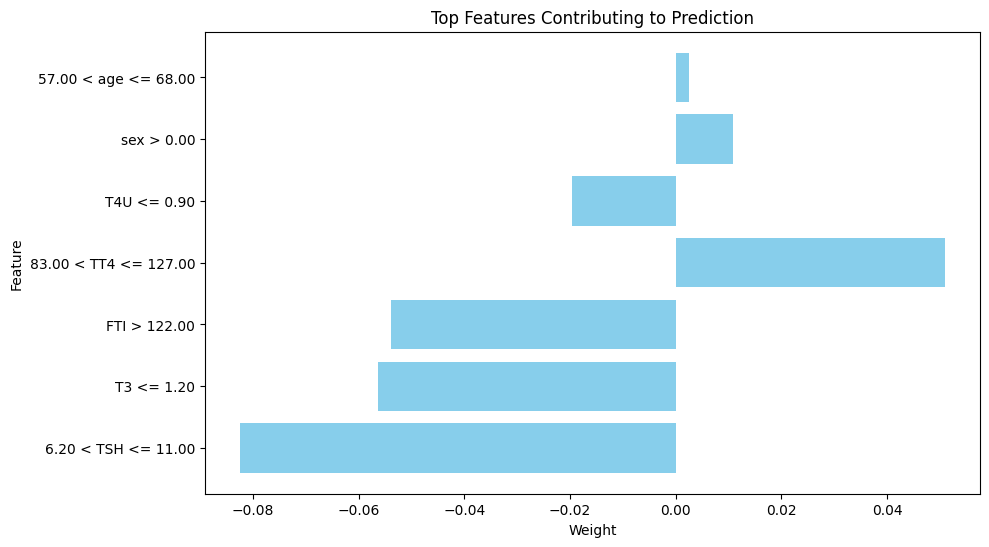

In [ ]:
# Interpretation and analysis of LIME explanations

# Assuming you have already generated explanations (exp)

# Get the original prediction made by the model
original_prediction = model.predict(X.iloc[[sample_index]])[0]

# Print the original prediction
print('Original prediction:', original_prediction)

# Print the explanation
print('Explanation:')
for feature, weight in exp.as_list():
    print(f"{feature}: {weight}")

# Analyze the explanation
# For example, you can identify the top features contributing to the prediction
top_features = exp.as_list()
top_positive_features = [feature for feature, weight in top_features if weight > 0]
top_negative_features = [feature for feature, weight in top_features if weight < 0]

# Print top contributing features
print('Top positive features:', top_positive_features)
print('Top negative features:', top_negative_features)

# Calculate the overall importance of each feature
feature_importance = {feature: abs(weight) for feature, weight in top_features}
sorted_feature_importance = sorted(feature_importance.items(), key=lambda x: x[1], reverse=True)

# Print sorted feature importance
print('Feature importance:')
for feature, importance in sorted_feature_importance:
    print(f"{feature}: {importance}")

# Visualize the explanation
# You can visualize the LIME explanation using various plotting libraries such as matplotlib or seaborn
import matplotlib.pyplot as plt

# Extract feature names and weights
features = [feature for feature, _ in top_features]
weights = [weight for _, weight in top_features]

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(features, weights, color='skyblue')
plt.xlabel('Weight')
plt.ylabel('Feature')
plt.title('Top Features Contributing to Prediction')
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define and fit the initial model
initial_model = RandomForestClassifier(random_state=42)
initial_model.fit(X_train, y_train)

# Evaluate initial model performance using cross-validation
initial_model_cv_scores = cross_val_score(initial_model, X_train, y_train, cv=5)
print("Initial Model Cross-Validation Scores:", initial_model_cv_scores)
print("Mean CV Accuracy:", initial_model_cv_scores.mean())

# Get feature importance from the initial model
feature_importance = initial_model.feature_importances_

# Refine the model based on feature importance
# For example, you can select top features or remove less important features
top_n_features = 10  # Select top N features
top_features_indices = feature_importance.argsort()[-top_n_features:][::-1]
X_train_refined = X_train.iloc[:, top_features_indices]
X_test_refined = X_test.iloc[:, top_features_indices]

# Define and fit the refined model
refined_model = RandomForestClassifier(random_state=42)
refined_model.fit(X_train_refined, y_train)

# Evaluate refined model performance using cross-validation
refined_model_cv_scores = cross_val_score(refined_model, X_train_refined, y_train, cv=5)
print("\nRefined Model Cross-Validation Scores:", refined_model_cv_scores)
print("Mean CV Accuracy:", refined_model_cv_scores.mean())


Initial Model Cross-Validation Scores: [0.98717949 1.         1.         1.         1.        ]
Mean CV Accuracy: 0.9974358974358974

Refined Model Cross-Validation Scores: [0.98717949 1.         1.         1.         1.        ]
Mean CV Accuracy: 0.9974358974358974


In [ ]:
import lime
import lime.lime_tabular
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

# Create the LIME explainer
explainer = lime.lime_tabular.LimeTabularExplainer(X_train_refined.values,
                                                   feature_names=X_train_refined.columns,
                                                   class_names=['Negative', 'Positive'])

# Select a sample for explanation
sample_index = 0  # Replace with athe index of the sample you want to explain

# Generate the explanation for the refined model
exp_refined = explainer.explain_instance(X_train_refined.iloc[sample_index].values,
                                         refined_model.predict_proba,
                                         num_features=len(X_train_refined.columns))

# Print the explanation for the refined model
print('Refined Model Prediction:', refined_model.predict(X_train_refined.iloc[[sample_index]])[0])
print('Explanation for Refined Model:')
for feature, weight in exp_refined.as_list():
    print(f"{feature}: {weight}")

Refined Model Prediction: 3
Explanation for Refined Model:
6.15 < TSH <= 11.00: -0.09048469821842985
84.00 < FTI <= 125.50: 0.06994047599477887
1.80 < T3 <= 2.60: -0.05812976890217278
84.00 < TT4 <= 131.00: 0.03517091552274445
0.99 < T4U <= 1.10: 0.013710884606958367
sex <= 0.00: 0.008599475190687572
41.50 < age <= 57.00: 0.0018518347893323702


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Model validation using additional evaluation metrics
refined_model_test_acc = accuracy_score(y_test, refined_model.predict(X_test_refined))
precision = precision_score(y_test, refined_model.predict(X_test_refined), average='weighted')
recall = recall_score(y_test, refined_model.predict(X_test_refined), average='weighted')
f1 = f1_score(y_test, refined_model.predict(X_test_refined), average='weighted')

print("\nRefined Model Test Accuracy:", refined_model_test_acc)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Refined Model Test Accuracy: 0.9896907216494846
Precision: 0.9903780068728522
Recall: 0.9896907216494846
F1 Score: 0.9888375399928903


In [ ]:
# Compare explanations between initial and refined models
print('Initial Model Explanation:')
for feature, weight in exp.as_list():
    print(f"{feature}: {weight}")

print('\nRefined Model Explanation:')
for feature, weight in exp_refined.as_list():
    print(f"{feature}: {weight}")

# Analyze feature importance from refined model explanation
refined_feature_importance = {feature: abs(weight) for feature, weight in exp_refined.as_list()}
sorted_refined_feature_importance = sorted(refined_feature_importance.items(), key=lambda x: x[1], reverse=True)

# Print sorted feature importance from refined model explanation
print('\nFeature Importance from Refined Model Explanation:')
for feature, importance in sorted_refined_feature_importance:
    print(f"{feature}: {importance}")

from sklearn.metrics import precision_score, recall_score, f1_score

# Model validation using additional evaluation metrics
refined_model_test_acc = accuracy_score(y_test, refined_model.predict(X_test_refined))
precision = precision_score(y_test, refined_model.predict(X_test_refined), average='weighted')
recall = recall_score(y_test, refined_model.predict(X_test_refined), average='weighted')
f1 = f1_score(y_test, refined_model.predict(X_test_refined), average='weighted')

print("\nRefined Model Test Accuracy:", refined_model_test_acc)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Initial Model Explanation:
6.20 < TSH <= 11.00: -0.08246048876677295
T3 <= 1.20: -0.05631244668325356
FTI > 122.00: -0.05385858799642152
83.00 < TT4 <= 127.00: 0.050903837985748546
T4U <= 0.90: -0.01970035833061553
sex > 0.00: 0.01085165407150522
57.00 < age <= 68.00: 0.0025847309052310073

Refined Model Explanation:
6.15 < TSH <= 11.00: -0.09048469821842985
84.00 < FTI <= 125.50: 0.06994047599477887
1.80 < T3 <= 2.60: -0.05812976890217278
84.00 < TT4 <= 131.00: 0.03517091552274445
0.99 < T4U <= 1.10: 0.013710884606958367
sex <= 0.00: 0.008599475190687572
41.50 < age <= 57.00: 0.0018518347893323702

Feature Importance from Refined Model Explanation:
6.15 < TSH <= 11.00: 0.09048469821842985
84.00 < FTI <= 125.50: 0.06994047599477887
1.80 < T3 <= 2.60: 0.05812976890217278
84.00 < TT4 <= 131.00: 0.03517091552274445
0.99 < T4U <= 1.10: 0.013710884606958367
sex <= 0.00: 0.008599475190687572
41.50 < age <= 57.00: 0.0018518347893323702

Refined Model Test Accuracy: 0.9896907216494846
Precisio

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Generate predictions on the test set
y_pred = model.predict(X_test)

# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Error analysis
misclassified_samples = X_test[y_test != y_pred]

print("\nMisclassified Samples:")
print(misclassified_samples.head())


Confusion Matrix:
[[14  0  0  0]
 [ 0  3  0  0]
 [ 0  0 31  0]
 [ 0  0  0 49]]

Misclassified Samples:
Empty DataFrame
Columns: [age, sex, TSH, T3, TT4, T4U, FTI]
Index: []


In [ ]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import lime.lime_tabular

# Define and create a pipeline for SVM
svm_model = make_pipeline(StandardScaler(), SVC(kernel='rbf', probability=True))

# Fit the SVM model
svm_model.fit(X_train, y_train)

# Create the LIME explainer
explainer_svm = lime.lime_tabular.LimeTabularExplainer(X_train.values,
                                                       feature_names=X_train.columns,
                                                       class_names=['Negative', 'Positive'])

# Select a sample for explanation
sample_index = 0  # Replace with the index of the sample you want to explain

# Generate the explanation for SVM model
exp_svm = explainer_svm.explain_instance(X_train.iloc[sample_index].values,
                                          svm_model.predict_proba,
                                          num_features=len(X_train.columns))

# Print the explanation for SVM model
print('SVM Model Prediction:', svm_model.predict(X_train.iloc[[sample_index]])[0])
print('Explanation for SVM Model:')
for feature, weight in exp_svm.as_list():
    print(f"{feature}: {weight}")


SVM Model Prediction: 3
Explanation for SVM Model:
1.80 < T3 <= 2.60: -0.06739024451511849
84.00 < FTI <= 125.50: 0.028905013453802985
84.00 < TT4 <= 131.00: 0.02556422366231987
6.15 < TSH <= 11.00: 0.020509191276093883
0.99 < T4U <= 1.10: 0.014026416331785004
41.50 < age <= 57.00: 0.005428374464208196
sex <= 0.00: 0.002876562086637903


In [ ]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
from sklearn.svm import SVC

# Instantiate and train an SVM model
model_svm = SVC(probability=True)  # Ensure probability estimates are enabled for LIME
model_svm.fit(X, y)

# Specify feature names
feature_names = X.columns.tolist()

# Create the LIME explainer with feature names
explainer = lime.lime_tabular.LimeTabularExplainer(X.values,
                                                   feature_names=feature_names,
                                                   class_names=['Negative', 'Positive'])

# Generate the explanation
exp = explainer.explain_instance(X.iloc[sample_index].values,
                                 model_svm.predict_proba,  # Use predict_proba for probability estimates
                                 num_features=len(X.columns))

# Print the explanation
print('Original prediction:', model_svm.predict(X.iloc[[sample_index]])[0])
print('Explanation:')
for feature, weight in exp.as_list():
    print(f"{feature}: {weight}")


Original prediction: 3
Explanation:
6.20 < TSH <= 11.00: -0.02113059574521583
FTI > 122.00: 0.016530953591181882
83.00 < TT4 <= 127.00: 0.008323650373104216
57.00 < age <= 68.00: -0.004519118099702942
T3 <= 1.20: -0.004439326033746371
sex > 0.00: -0.002182626619282256
T4U <= 0.90: -0.00025751404846105735


Original prediction: 3
Explanation:
6.20 < TSH <= 11.00: -0.02113059574521583
FTI > 122.00: 0.016530953591181882
83.00 < TT4 <= 127.00: 0.008323650373104216
57.00 < age <= 68.00: -0.004519118099702942
T3 <= 1.20: -0.004439326033746371
sex > 0.00: -0.002182626619282256
T4U <= 0.90: -0.00025751404846105735
Top positive features: ['FTI > 122.00', '83.00 < TT4 <= 127.00']
Top negative features: ['6.20 < TSH <= 11.00', '57.00 < age <= 68.00', 'T3 <= 1.20', 'sex > 0.00', 'T4U <= 0.90']
Feature importance:
6.20 < TSH <= 11.00: 0.02113059574521583
FTI > 122.00: 0.016530953591181882
83.00 < TT4 <= 127.00: 0.008323650373104216
57.00 < age <= 68.00: 0.004519118099702942
T3 <= 1.20: 0.004439326033746371
sex > 0.00: 0.002182626619282256
T4U <= 0.90: 0.00025751404846105735


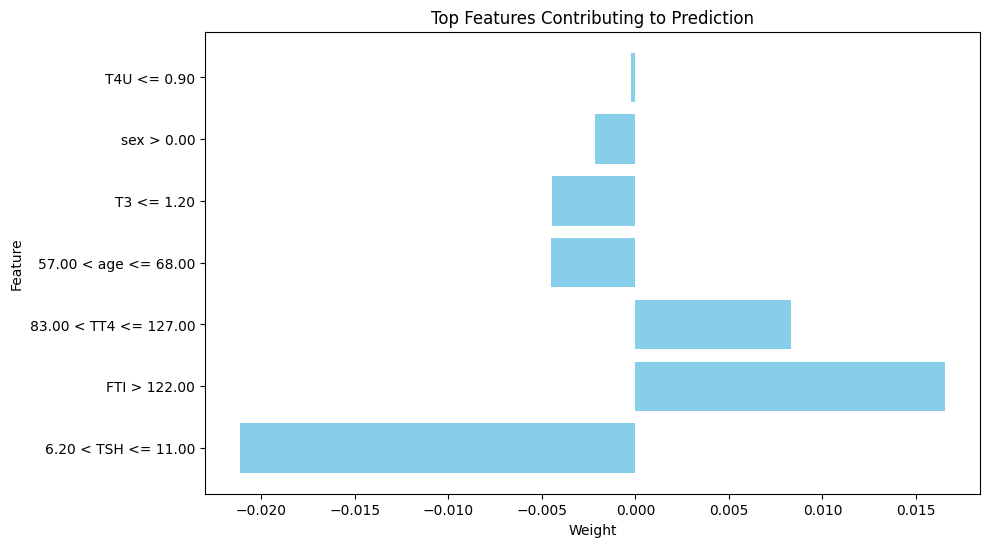

In [ ]:
from sklearn.svm import SVC

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define and fit the initial model (SVM)
initial_model_svm = SVC(kernel='linear', random_state=42)  # You can choose a different kernel if needed
initial_model_svm.fit(X_train, y_train)

# Evaluate initial model performance using cross-validation
initial_model_cv_scores_svm = cross_val_score(initial_model_svm, X_train, y_train, cv=5)
print("Initial Model Cross-Validation Scores (SVM):", initial_model_cv_scores_svm)
print("Mean CV Accuracy (SVM):", initial_model_cv_scores_svm.mean())

# Get feature coefficients from the initial SVM model
feature_coefficients_svm = initial_model_svm.coef_[0]

# Refine the model based on feature coefficients
# For example, you can select top features based on their coefficients
top_n_features_svm = 10  # Select top N features
top_features_indices_svm = feature_coefficients_svm.argsort()[-top_n_features_svm:][::-1]
X_train_refined_svm = X_train.iloc[:, top_features_indices_svm]
X_test_refined_svm = X_test.iloc[:, top_features_indices_svm]

# Define and fit the refined model (SVM)
refined_model_svm = SVC(kernel='linear', random_state=42)
refined_model_svm.fit(X_train_refined_svm, y_train)

# Evaluate refined model performance using cross-validation
refined_model_cv_scores_svm = cross_val_score(refined_model_svm, X_train_refined_svm, y_train, cv=5)
print("\nRefined Model Cross-Validation Scores (SVM):", refined_model_cv_scores_svm)
print("Mean CV Accuracy (SVM):", refined_model_cv_scores_svm.mean())


Initial Model Cross-Validation Scores (SVM): [1.         1.         1.         0.98701299 0.98701299]
Mean CV Accuracy (SVM): 0.9948051948051948

Refined Model Cross-Validation Scores (SVM): [1.         1.         1.         0.98701299 0.98701299]
Mean CV Accuracy (SVM): 0.9948051948051948


In [ ]:
import lime
import lime.lime_tabular
import warnings
from sklearn.svm import SVC
import numpy as np

warnings.filterwarnings("ignore", category=UserWarning)

# Define your SVM model with probability=False
svm_model = SVC(probability=False)
svm_model.fit(X_train_refined_svm, y_train)

# Create a custom predict_proba function using decision_function
def predict_proba_fn(X):
    decision_values = svm_model.decision_function(X)
    proba = decision_values[:, 1] / decision_values.sum(axis=1)
    return np.column_stack((1 - proba, proba))

# Create the LIME explainer
explainer = lime.lime_tabular.LimeTabularExplainer(X_train_refined_svm.values,
                                                   feature_names=X_train_refined_svm.columns,
                                                   class_names=['Negative', 'Positive'],
                                                   discretize_continuous=False)

# Select a sample for explanation
sample_index = 0  # Replace with the index of the sample you want to explain

# Generate the explanation for the refined model (SVM)
exp_refined_svm = explainer.explain_instance(X_train_refined_svm.iloc[sample_index].values,
                                              predict_proba_fn,
                                              num_features=len(X_train_refined_svm.columns))

# Print the explanation for the refined model (SVM)
print('Refined Model Prediction (SVM):', svm_model.predict(X_train_refined_svm.iloc[[sample_index]])[0])
print('Explanation for Refined Model (SVM):')
for feature, weight in exp_refined_svm.as_list():
    print(f"{feature}: {weight}")


Refined Model Prediction (SVM): 3
Explanation for Refined Model (SVM):
TSH: -0.03727086071402414
TT4: 0.021979456226495334
FTI: 0.007456711333977782
age: 0.0032776610471887653
sex: -0.0004506273406641903
T3: 0.0003698042563901567
T4U: -0.0001352824745693724


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Model validation using additional evaluation metrics
svm_model_test_acc = accuracy_score(y_test, svm_model.predict(X_test_refined_svm))
precision_svm = precision_score(y_test, svm_model.predict(X_test_refined_svm), average='weighted')
recall_svm = recall_score(y_test, svm_model.predict(X_test_refined_svm), average='weighted')
f1_svm = f1_score(y_test, svm_model.predict(X_test_refined_svm), average='weighted')

print("\nSVM Model Test Accuracy:", svm_model_test_acc)
print("Precision (SVM):", precision_svm)
print("Recall (SVM):", recall_svm)
print("F1 Score (SVM):", f1_svm)



SVM Model Test Accuracy: 0.9381443298969072
Precision (SVM): 0.9139643861293346
Recall (SVM): 0.9381443298969072
F1 Score (SVM): 0.9236784096560438


In [ ]:
# Compare explanations between initial and refined models
print('Initial Model Explanation:')
for feature, weight in exp.as_list():
    print(f"{feature}: {weight}")

print('\nRefined Model Explanation:')
for feature, weight in exp_refined_svm.as_list():
    print(f"{feature}: {weight}")

# Analyze feature importance from refined model explanation
refined_feature_importance = {feature: abs(weight) for feature, weight in exp_refined_svm.as_list()}
sorted_refined_feature_importance = sorted(refined_feature_importance.items(), key=lambda x: x[1], reverse=True)

# Print sorted feature importance from refined model explanation
print('\nFeature Importance from Refined Model Explanation:')
for feature, importance in sorted_refined_feature_importance:
    print(f"{feature}: {importance}")

from sklearn.metrics import precision_score, recall_score, f1_score

# Model validation using additional evaluation metrics
svm_model_test_acc = accuracy_score(y_test, svm_model.predict(X_test_refined_svm))
precision_svm = precision_score(y_test, svm_model.predict(X_test_refined_svm), average='weighted')
recall_svm = recall_score(y_test, svm_model.predict(X_test_refined_svm), average='weighted')
f1_svm = f1_score(y_test, svm_model.predict(X_test_refined_svm), average='weighted')

print("\nSVM Model Test Accuracy:", svm_model_test_acc)
print("Precision (SVM):", precision_svm)
print("Recall (SVM):", recall_svm)
print("F1 Score (SVM):", f1_svm)


Initial Model Explanation:
6.20 < TSH <= 11.00: -0.02113059574521583
FTI > 122.00: 0.016530953591181882
83.00 < TT4 <= 127.00: 0.008323650373104216
57.00 < age <= 68.00: -0.004519118099702942
T3 <= 1.20: -0.004439326033746371
sex > 0.00: -0.002182626619282256
T4U <= 0.90: -0.00025751404846105735

Refined Model Explanation:
TSH: -0.03727086071402414
TT4: 0.021979456226495334
FTI: 0.007456711333977782
age: 0.0032776610471887653
sex: -0.0004506273406641903
T3: 0.0003698042563901567
T4U: -0.0001352824745693724

Feature Importance from Refined Model Explanation:
TSH: 0.03727086071402414
TT4: 0.021979456226495334
FTI: 0.007456711333977782
age: 0.0032776610471887653
sex: 0.0004506273406641903
T3: 0.0003698042563901567
T4U: 0.0001352824745693724

SVM Model Test Accuracy: 0.9381443298969072
Precision (SVM): 0.9139643861293346
Recall (SVM): 0.9381443298969072
F1 Score (SVM): 0.9236784096560438


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Generate predictions on the test set for the SVM model
y_pred_svm = svm_model.predict(X_test_refined_svm)

# Confusion matrix for the SVM model
print("\nConfusion Matrix (SVM):")
print(confusion_matrix(y_test, y_pred_svm))

# Error analysis for the SVM model
misclassified_samples_svm = X_test_refined_svm[y_test != y_pred_svm]

print("\nMisclassified Samples (SVM):")
print(misclassified_samples_svm.head())



Confusion Matrix (SVM):
[[14  0  0  0]
 [ 0  0  0  3]
 [ 0  0 28  3]
 [ 0  0  0 49]]

Misclassified Samples (SVM):
        FTI    TT4  sex   T4U     TSH   T3  age
426    59.0   56.0    0  0.95  15.000  1.8   14
2214  155.0  130.0    1  0.84   0.005  3.0   43
1883  122.0  138.0    0  1.13   0.065  5.1   34
375   107.0  131.0    0  1.23   0.100  3.0   24
76     61.0   66.0    0  1.09  19.000  2.3   73


In [ ]:
# Compare explanations
print("Explanation Comparison:")
print("\nRandom Forest Model Explanation:")
for feature, weight in exp.as_list():
    print(f"{feature}: {weight}")

print("\nSVM Model Explanation:")
for feature, weight in exp_svm.as_list():
    print(f"{feature}: {weight}")

# Compare model performance
print("\nModel Performance Comparison:")
print("Random Forest Model Test Accuracy:", accuracy_score(y_test, model.predict(X_test)))
print("SVM Model Test Accuracy:", accuracy_score(y_test, svm_model.predict(X_test_refined_svm)))

# Compare confusion matrices
print("\nConfusion Matrix Comparison:")
print("Confusion Matrix for Random Forest Model:")
print(confusion_matrix(y_test, model.predict(X_test)))
print("\nConfusion Matrix for SVM Model:")
print(confusion_matrix(y_test, svm_model.predict(X_test_refined_svm)))

# Compare error analysis
print("\nError Analysis Comparison:")
print("Misclassified Samples for Random Forest Model:")
print(misclassified_samples.head())
print("\nMisclassified Samples for SVM Model:")
print(misclassified_samples_svm.head())


Explanation Comparison:

Random Forest Model Explanation:
6.20 < TSH <= 11.00: -0.02113059574521583
FTI > 122.00: 0.016530953591181882
83.00 < TT4 <= 127.00: 0.008323650373104216
57.00 < age <= 68.00: -0.004519118099702942
T3 <= 1.20: -0.004439326033746371
sex > 0.00: -0.002182626619282256
T4U <= 0.90: -0.00025751404846105735

SVM Model Explanation:
1.80 < T3 <= 2.60: -0.06739024451511849
84.00 < FTI <= 125.50: 0.028905013453802985
84.00 < TT4 <= 131.00: 0.02556422366231987
6.15 < TSH <= 11.00: 0.020509191276093883
0.99 < T4U <= 1.10: 0.014026416331785004
41.50 < age <= 57.00: 0.005428374464208196
sex <= 0.00: 0.002876562086637903

Model Performance Comparison:
Random Forest Model Test Accuracy: 1.0
SVM Model Test Accuracy: 0.9381443298969072

Confusion Matrix Comparison:
Confusion Matrix for Random Forest Model:
[[14  0  0  0]
 [ 0  3  0  0]
 [ 0  0 31  0]
 [ 0  0  0 49]]

Confusion Matrix for SVM Model:
[[14  0  0  0]
 [ 0  0  0  3]
 [ 0  0 28  3]
 [ 0  0  0 49]]

Error Analysis Comp

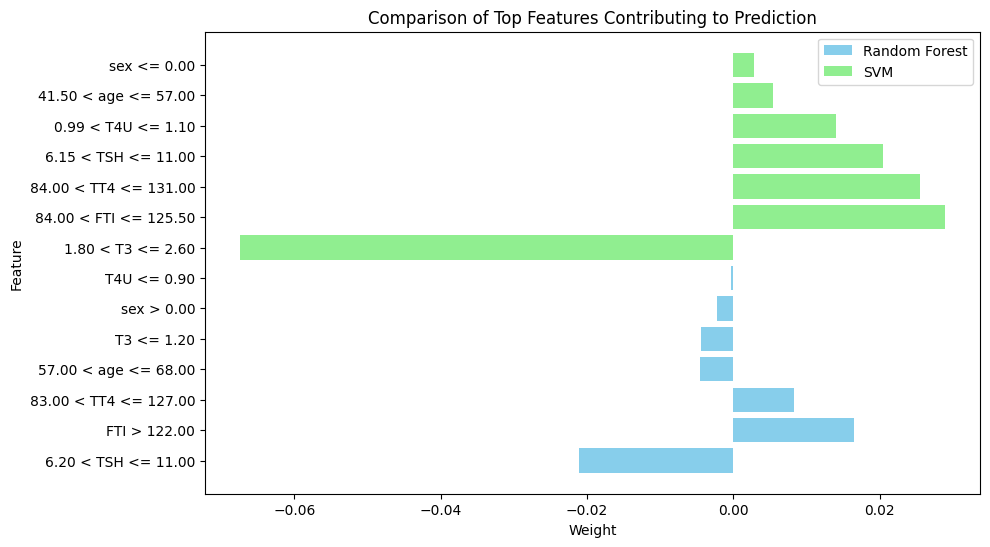

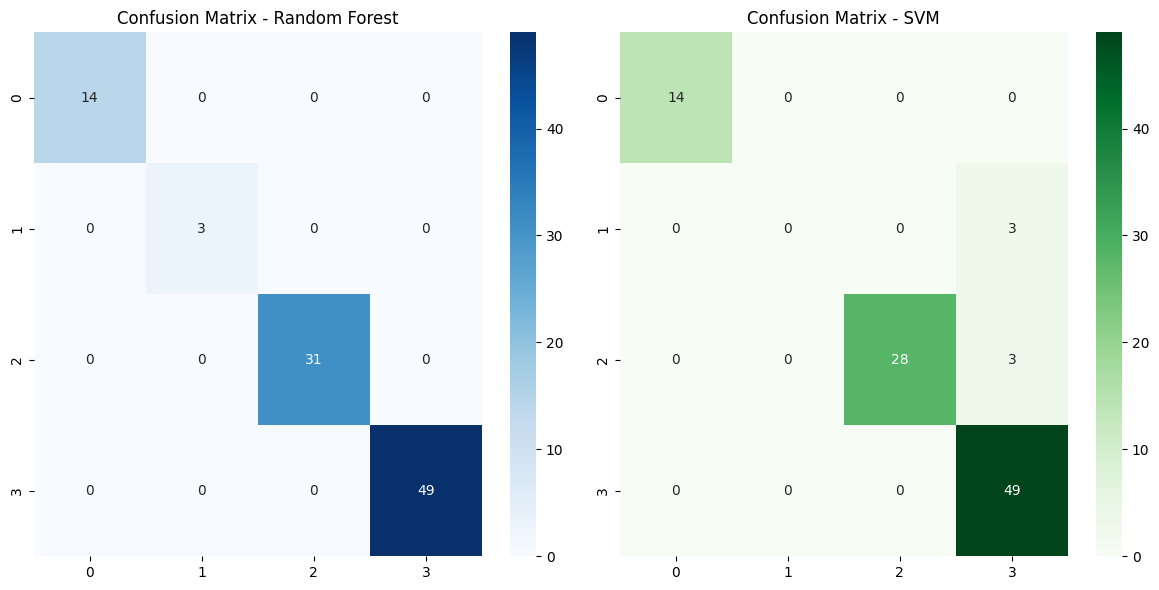

In [ ]:
import matplotlib.pyplot as plt
# Get feature names and weights for SVM model's explanation
features_svm = [feature for feature, _ in exp_svm.as_list()]
weights_svm = [weight for _, weight in exp_svm.as_list()]

# Visualize feature importance comparison
plt.figure(figsize=(10, 6))
plt.barh(features, weights, color='skyblue', label='Random Forest')
plt.barh(features_svm, weights_svm, color='lightgreen', label='SVM')
plt.xlabel('Weight')
plt.ylabel('Feature')
plt.title('Comparison of Top Features Contributing to Prediction')
plt.legend()
plt.show()

# Visualize confusion matrices comparison
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.heatmap(confusion_matrix(y_test, model.predict(X_test)), annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Confusion Matrix - Random Forest')

sns.heatmap(confusion_matrix(y_test, svm_model.predict(X_test_refined_svm)), annot=True, fmt='d', cmap='Greens', ax=axes[1])
axes[1].set_title('Confusion Matrix - SVM')

plt.tight_layout()
plt.show()
